atividade 4 
aluno : vilgledyson nobrega dos santos
professor : ricardo roberto 


In [1]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# Carregando o conjunto de dados Iris
iris = load_iris()

# Criando um DataFrame para facilitar
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

# Exibindo as primeiras linhas do DataFrame
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [5]:
# Definindo as características e o alvo
X = df.drop(['target', 'species'], axis=1)
y = df['target']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f'Tamanho do conjunto de treino: {X_train.shape[0]} amostras')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]} amostras')


Tamanho do conjunto de treino: 105 amostras
Tamanho do conjunto de teste: 45 amostras


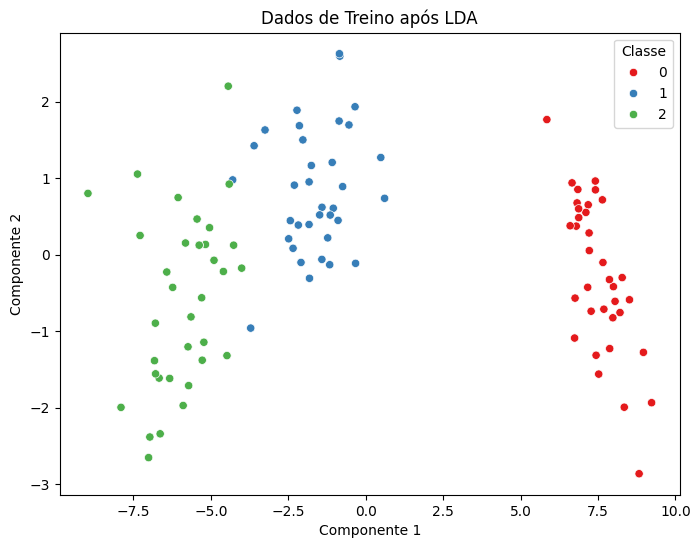

In [7]:
# Inicializando a LDA
lda = LinearDiscriminantAnalysis(n_components=2)

# Ajustando a LDA aos dados de treino
X_train_lda = lda.fit_transform(X_train, y_train)

# Transformando os dados de teste
X_test_lda = lda.transform(X_test)


plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train_lda[:,0], y=X_train_lda[:,1], hue=y_train, palette='Set1')
plt.title('Dados de Treino após LDA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title='Classe')
plt.show()


In [8]:
# Inicializando o classificador LDA
clf = LinearDiscriminantAnalysis()

# Treinando o modelo com os dados de treino
clf.fit(X_train, y_train)


LinearDiscriminantAnalysis()

Precisão do modelo LDA: 97.78%

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



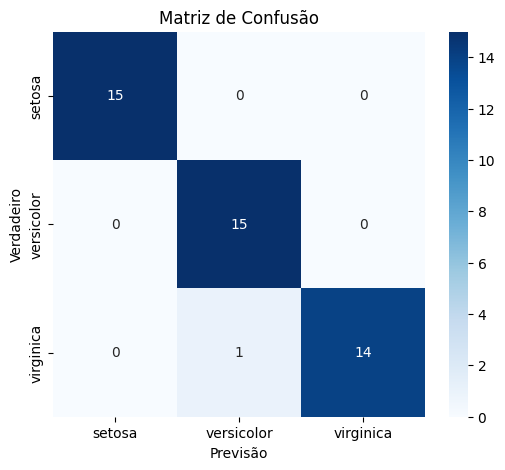

In [10]:
# Fazendo previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisão do modelo LDA: {accuracy * 100:.2f}%')

# Exibindo o relatório de classificação
print('\nRelatório de Classificação:')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Exibindo a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()
